# **Analyze Semantic Change (COHA)**
## **Goal**: Use trained `Word2vec` embeddings to examine semantic change over time.

### **Imports**

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from ngramprep.common.w2v_model import W2VModel
from analyze.cosine_similarity_time_series import cosine_similarity_over_years, plot_nearest_neighbors
from analyze.weat_time_series import compute_weat_over_years
from analyze.dimension_projection_time_series import compute_projection_over_years, compute_baseline_set
from analyze.pca_dimension_time_series import compute_pca_dimension_over_years
from analyze.semantic_drift import track_local_semantic_change, track_global_semantic_change, track_directional_drift
from analyze.average_relatedness_by_year import track_word_relatedness

The `ngram-kit` package contains several tools useful in quantifying how much word meanings have changed over the years. Before using these tools, it helps to set a model path variable. Most commonly, this will point to the `norm_and_align` directory. We'll also set a `corpus_path` variable pointing to the yearly corpus data.

In [2]:
model_path = f'/scratch/edk202/NLP_models/COHA/COHA/models_final/norm_and_align'

### `compare_words_cosim` method

Let's say we want to measure the relationship between three pairs of words — _horse_ and _donkey_, _horse_ and _lizard_ , and _horse_ and _amoeba_ — in the 2019 corpus. We first create a `W2VModel` instance for the 2019 embeddings. Then, we call the `compare_words_cosim` method for our words.

In [8]:
year = 2005
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs100_w015_mc001_sg1_e010.kv')

word1, word2 = 'horse', 'pony'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'bear'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'fish'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'microbe'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

cos(Φ) of 'horse' and 'pony' in 2005 = 0.5684
cos(Φ) of 'horse' and 'bear' in 2005 = 0.3378
cos(Φ) of 'horse' and 'fish' in 2005 = 0.2120
cos(Φ) of 'horse' and 'microbe' in 2005 = 0.1118


The results are about what you'd expect!

### `compare_models_cosim` method
Suppose we want to compare the semantic similarity of the _same_ words across _models_. We can use the `compare_models_cosim` method to compute the average cosine similarity between shared words in two models. Or, if we specify the `word` parameter, we can compute similarity for a single word across the models.

In [10]:
year = 2005
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs100_w015_mc001_sg1_e010.kv')
reference_model = W2VModel(f'{model_path}/w2v_y2000_wbnone_vs100_w015_mc001_sg1_e010.kv')

cosim_mean, cosim_sd, shared_words = model.compare_models_cosim(reference_model)
print(f"Overall similarity between models:\n  cos(Φ) mean = {cosim_mean:.4f}\n  cos(Φ) SD = {cosim_sd:.4f}\n  shared words: {shared_words}\n")

word = 'horse'
cosim, _, _ = model.compare_models_cosim(reference_model, word)
print(f"Similarity of \'{word}\' between models:\n  cos(Φ) = {cosim:.4f}\n")

Overall similarity between models:
  cos(Φ) mean = 0.5751
  cos(Φ) SD = 0.1252
  shared words: 17646

Similarity of 'horse' between models:
  cos(Φ) = 0.7819



### `mean_cosine_similarity_to_all` method

In [11]:
year = 2000
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs100_w015_mc001_sg1_e010.kv')

mean_sim = model.mean_cosine_similarity_to_all('person', '')

print(f"Mean cosine similarity = {mean_sim:.4f}")

Mean cosine similarity = 0.1890


### `track_local_semantic_change` function

⚠️ No models found for these years: [1901, 1902, 1903, 1904, 1906, 1907, 1908, 1909, 1911, 1912, 1913, 1914, 1916, 1917, 1918, 1919, 1921, 1922, 1923, 1924, 1926, 1927, 1928, 1929, 1931, 1932, 1933, 1934, 1936, 1937, 1938, 1939, 1941, 1942, 1943, 1944, 1946, 1947, 1948, 1949, 1951, 1952, 1953, 1954, 1956, 1957, 1958, 1959, 1961, 1962, 1963, 1964, 1966, 1967, 1968, 1969, 1971, 1972, 1973, 1974, 1976, 1977, 1978, 1979, 1981, 1982, 1983, 1984, 1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999]


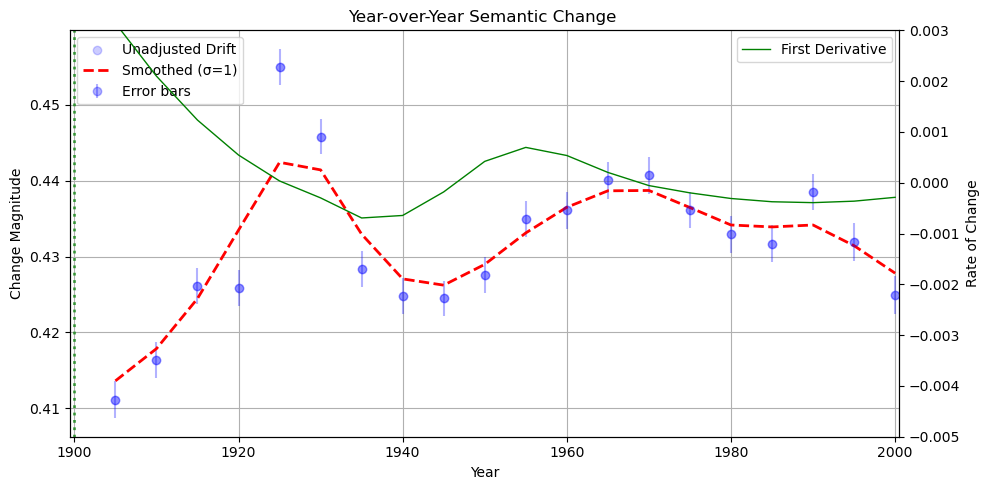

In [12]:
drift_scores = track_local_semantic_change(
    start_year=1900,
    end_year=2000,
    year_step=1,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=1,
    confidence=0.99
)

### Track `track_global_semantic_change` function

⚠️ No models found for these years: [1901, 1902, 1903, 1904, 1906, 1907, 1908, 1909, 1911, 1912, 1913, 1914, 1916, 1917, 1918, 1919, 1921, 1922, 1923, 1924, 1926, 1927, 1928, 1929, 1931, 1932, 1933, 1934, 1936, 1937, 1938, 1939, 1941, 1942, 1943, 1944, 1946, 1947, 1948, 1949, 1951, 1952, 1953, 1954, 1956, 1957, 1958, 1959, 1961, 1962, 1963, 1964, 1966, 1967, 1968, 1969, 1971, 1972, 1973, 1974, 1976, 1977, 1978, 1979, 1981, 1982, 1983, 1984, 1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999]


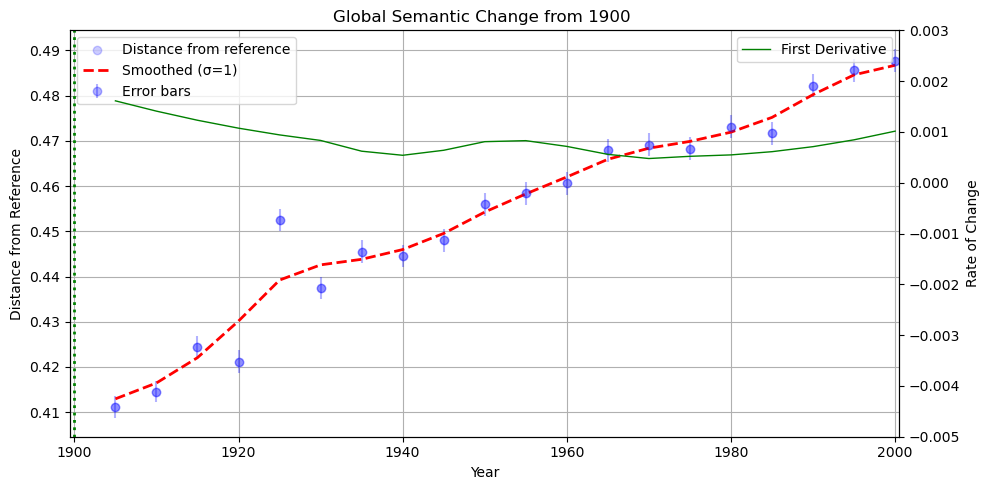

In [13]:
drift_scores = track_global_semantic_change(
    start_year=1900,
    end_year=2000,
    year_step=1,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=1,
    confidence=0.99
)

### `track_word_relatedness` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

Computing mean cosine similarity for 1 words (Excluding: 0 words)
⚠️ No models found for these years: [1901, 1902, 1903, 1904, 1906, 1907, 1908, 1909, 1911, 1912, 1913, 1914, 1916, 1917, 1918, 1919, 1921, 1922, 1923, 1924, 1926, 1927, 1928, 1929, 1931, 1932, 1933, 1934, 1936, 1937, 1938, 1939, 1941, 1942, 1943, 1944, 1946, 1947, 1948, 1949, 1951, 1952, 1953, 1954, 1956, 1957, 1958, 1959, 1961, 1962, 1963, 1964, 1966, 1967, 1968, 1969, 1971, 1972, 1973, 1974, 1976, 1977, 1978, 1979, 1981, 1982, 1983, 1984, 1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004]


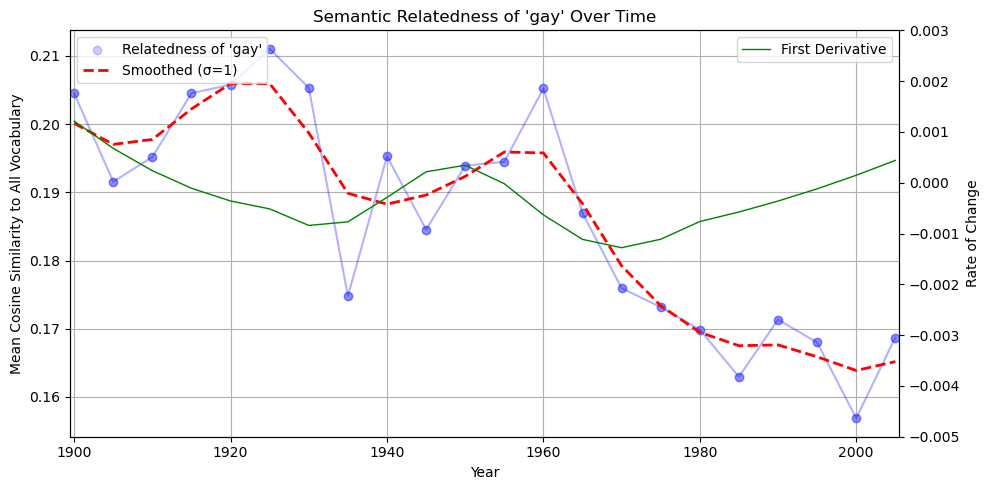

In [14]:
relatedness_scores = track_word_relatedness(
    word=['gay'],
    start_year=1900,
    end_year=2005,
    year_step=1,
    model_dir=model_path,
    plot=1,
    smooth=True,
    sigma=1
)

### `cosine_similarity_over_years` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

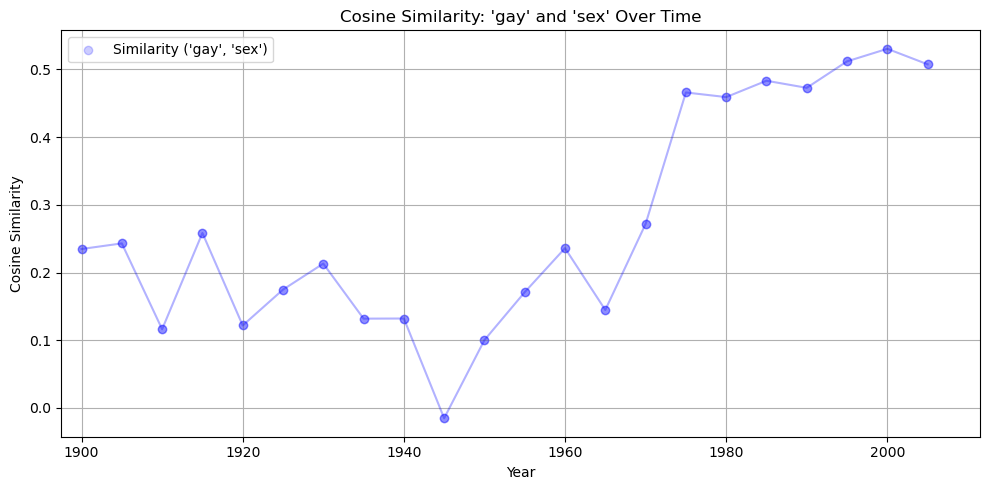

In [19]:
sim_scores = cosine_similarity_over_years(
    word1=['gay'],
    word2=['sex'],
    start_year=1900,
    end_year=2009,
    year_step=5,
    model_dir=model_path,
    plot=1,
    smooth=False,
    sigma=1
)

### `track_directional_drift` function

Loading embeddings for word 'gay' across 22 years...


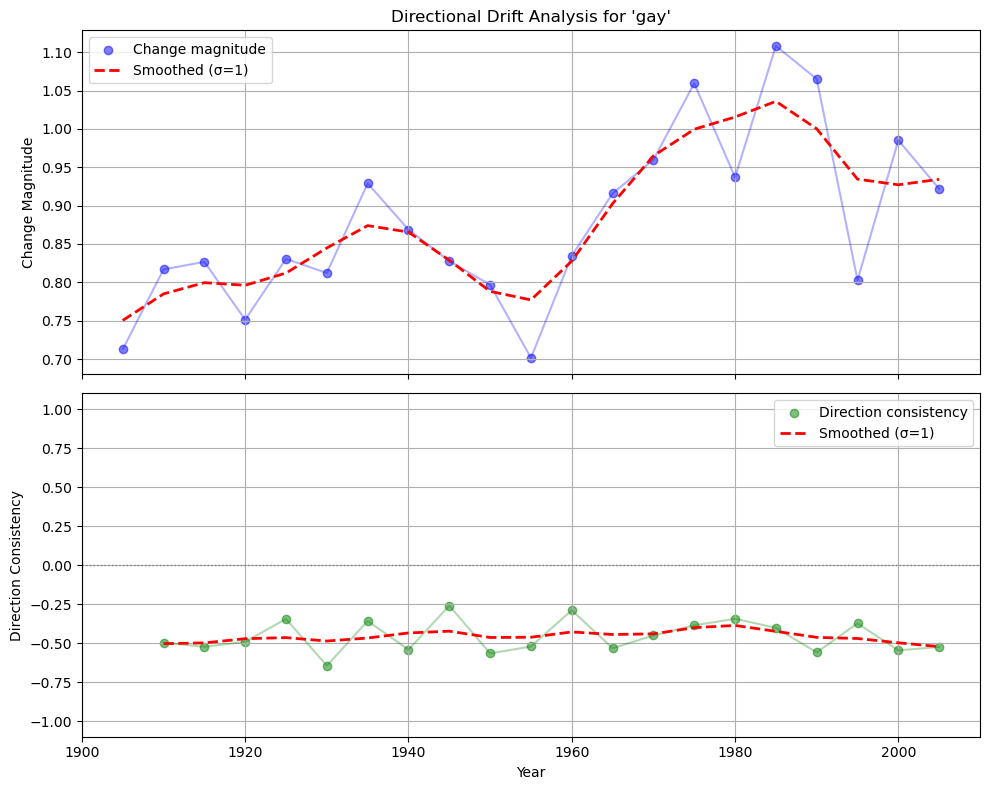

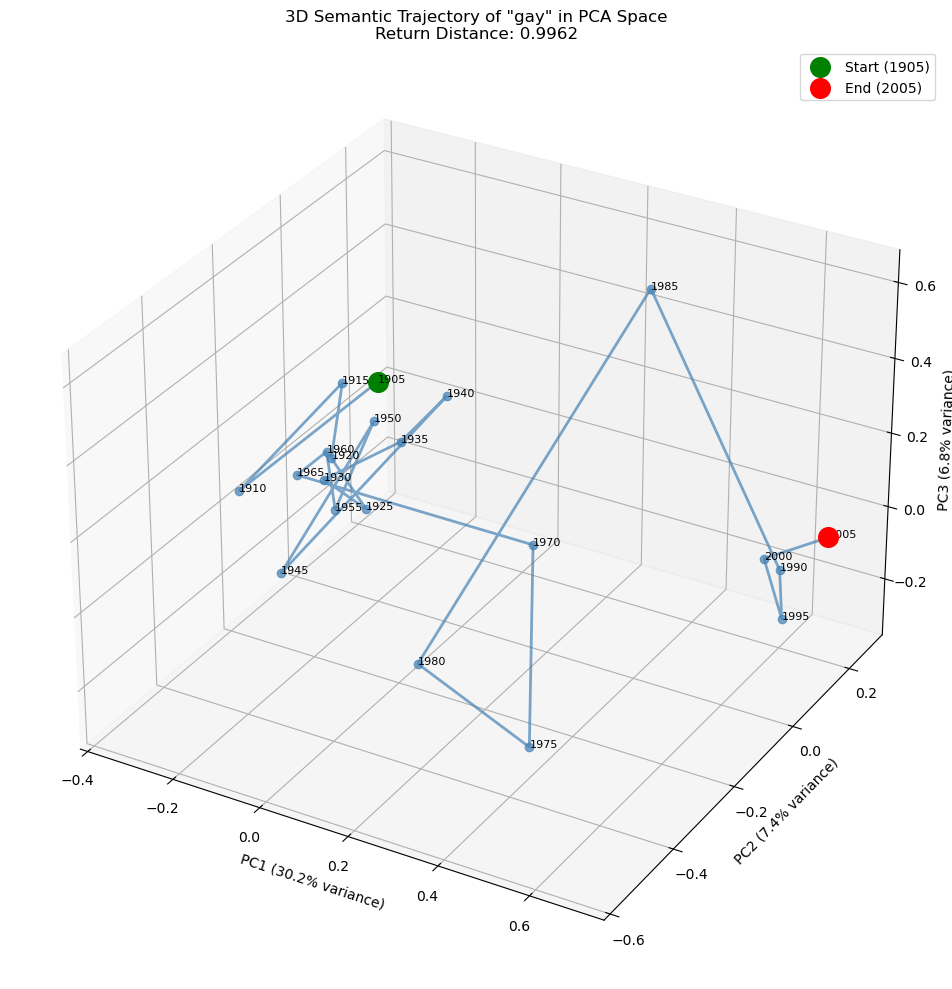

In [20]:
drift_scores = track_directional_drift(
    word='gay',
    start_year=1900,
    end_year=2005,
    year_step=5,
    model_dir=model_path,
    plot=True,
    smooth=True,
    sigma=1,
    plot_trajectory=True,
    trajectory_3d=True
)

### `plot_nearest_neighbors` function

This function plots the N nearest neighbors to a target word for a specific year, showing their cosine similarity scores in a horizontal bar chart.

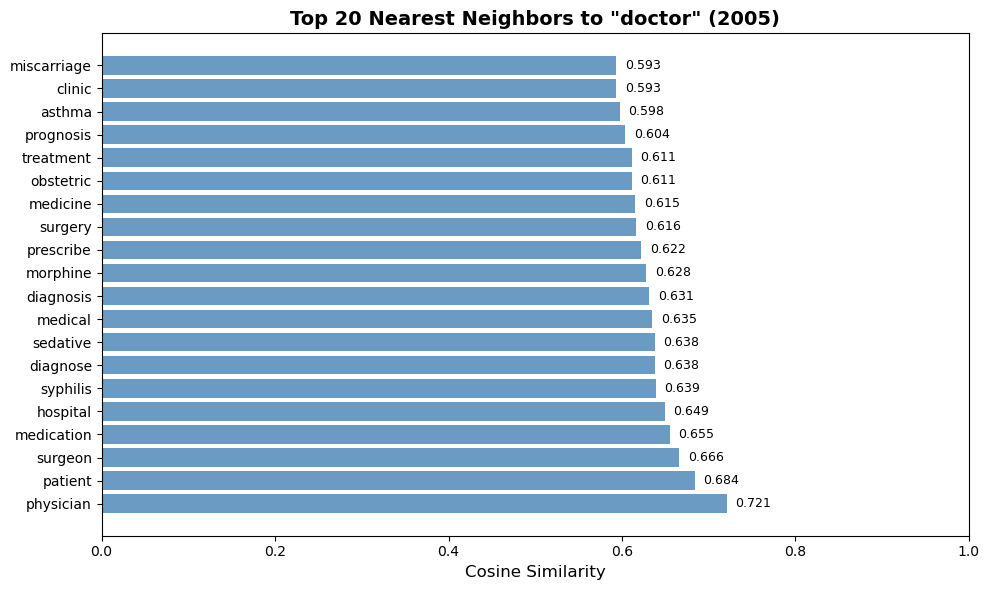

In [29]:
neighbors = plot_nearest_neighbors(
    word='doctor',
    year=2005,
    model_dir=model_path,
    n=20
)

### `compute_weat` method
This method runs a Word Embedding Association Test (WEAT) as described in [Caliskan, Bryson, and Narayanan, 2017](https://www.science.org/doi/10.1126/science.aal4230). The WEAT is a close analog of the Implicit Association Test (IAT; [Greenwald, McGhee, & Schwarz, 1995](https://psycnet.apa.org/record/1998-02892-004))—but, whereas the IAT uses reaction latencies to measure a person's cognitive association between two mental category constrasts, the WEAT uses cosine similarities to measure the semantic association between linguistic category contrasts in a corpus.

Just as with the IAT, the WEAT requires that you select two constrasting "target" categories (e.g., _man_ vs. _woman_) and two contrasting "attribute" categories (e.g., _science_ vs. _art_), as well as a list of exemplars of each of these four categories. The `compute_weat` method then:
1. calculates the mean of all pairwise cosine similarities among exemplars within each target–attribute combination (e.g., $\bar c_{man, science}$, $\bar c_{man, art}$, $\bar c_{woman, science}$, $\bar c_{woman, art}$),
2. takes the difference in mean similarity between combinations involving the same target (e.g., $\bar c_{man, science} - \bar c_{man, art}$ and $\bar c_{woman, science} - \bar c_{woman, art}$),
3. subtracts these differences from one another (e.g., $[(\bar c_{man, science} - \bar c_{man, art}) - (\bar c_{woman, science} - \bar c_{woman, art})]$), and
4. divides this difference by the pooled standard deviation across all exemplars for all target–attribute pairs.

This calculation yields an effect size, $d$, analogous to that used in IAT research. Higher scores indicate a stronger relative semantic link between the first target and first attribute (e.g., between _man_ and _science_).

In [3]:
model = W2VModel(f'{model_path}/w2v_y2005_wbnone_vs100_w015_mc001_sg1_e010.kv')

target1 = ['doctor']
target2 = ['nurse']
attribute1 = ['male', "he", "him", "his", "himself", "man", "men", "boy", "boys", "mother", "mothers", "son", "sons", "brother", "brothers"]
attribute2 = ['female', "she", "her", "hers", "herself", "woman", "women", "girl", "girls", "mother", "mothers", "daughter", "daughters", "sister", "sisters"]

weat_score, p = model.compute_weat(
    target1,
    target2,
    attribute1,
    attribute2,
    num_permutations=1_000
)

print(f"WEAT effect size (Cohen's d) = {weat_score:.4f}, p = {p:.4f}")

WEAT effect size (Cohen's d) = 1.4142, p = 0.0000


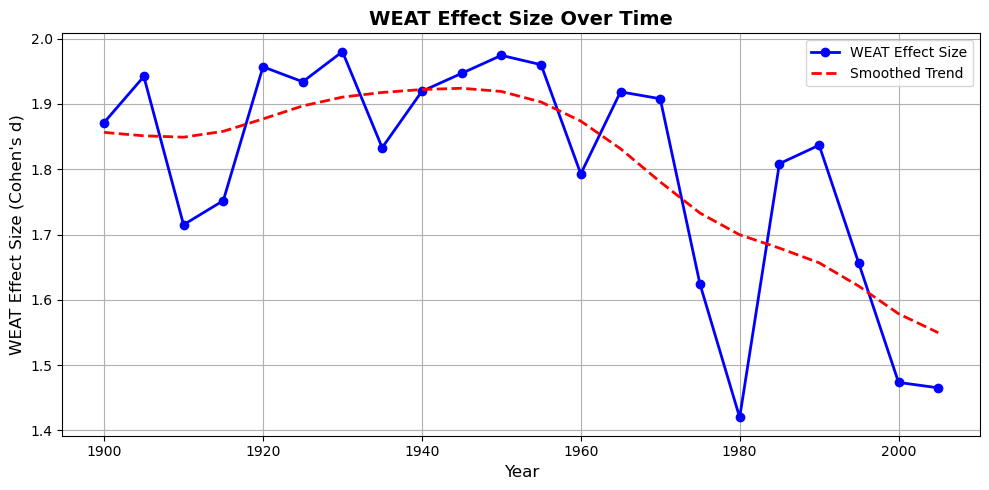

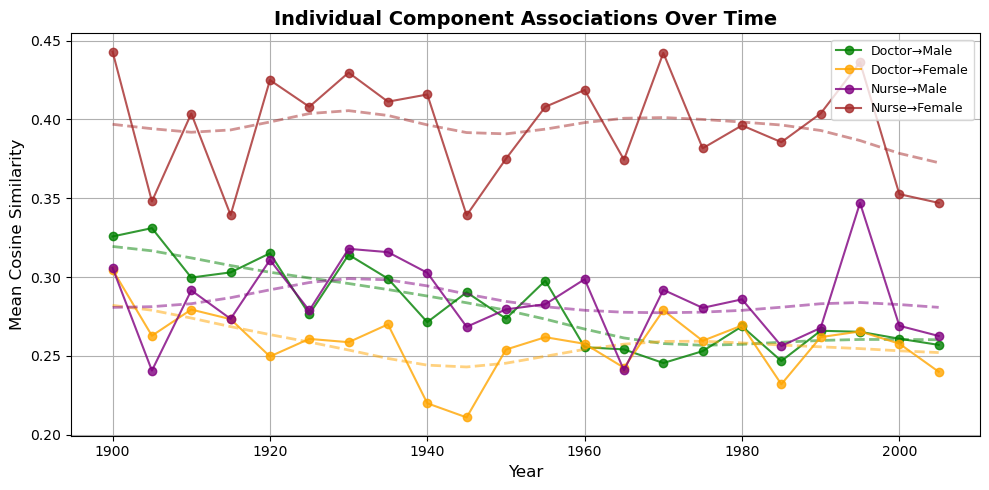

In [15]:
target1 = {'Doctor': ["doctor", "physician", "surgeon"]}
target2 = {'Nurse': ["nurse"]}
attribute1 = {'Male': ["male", "he", "him", "his", "himself", "man", "men", "boy", "boys", "son", "sons", "brother", "brothers"]}
attribute2 = {'Female': ["female", "she", "her", "hers", "herself", "woman", "women", "girl", "girls", "mother", "mothers", "daughter", "daughters", "sister", "sisters"]}

weat_scores = compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2009,
    year_step=5,
    model_dir=f"{model_path}",
    num_permutations=0,
    plot=1,
    smooth=True,
    sigma=2,
    return_std=False,
    return_associations=True,
    plot_associations=['Nurse→Female', 'Nurse→Male', 'Doctor→Female', 'Doctor→Male']
)

### `compute_meandiff_dimension` method

In [17]:
year = 1900
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs100_w015_mc001_sg1_e010.kv')

gender_contrasts = [
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

meandiff_result = model.compute_meandiff_dimension(
    token_contrasts=gender_contrasts
)

W2VModel.print_meandiff_summary(meandiff_result)
W2VModel.print_component_loadings(meandiff_result, title="COMPONENT LOADINGS")


════════════════════════════════════════════════════════════════════════════════════════════════════
MEAN-DIFFERENCE DIMENSION SUMMARY
════════════════════════════════════════════════════════════════════════════════════════════════════
Valid pairs:             14

Pair Loading Statistics:
────────────────────────────────────────────────────────────────────────────────────────────────────
Mean loading:                          0.6456
Std deviation:                         0.1359
Min loading:                           0.3936
Max loading:                           0.8634
Loading range:                         0.4698
Coeff. of variation:                   0.2105

────────────────────────────────────────────────────────────────────────────────────────────────────
Pair Coherence:          GOOD (coherent pairs)
────────────────────────────────────────────────────────────────────────────────────────────────────

All 14 pair loadings are positive by construction.
Loading range of 0.3936–0.8634

### `print_word_projections` method

In [19]:
year = 1950
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs100_w015_mc001_sg1_e010.kv')

gender_contrasts = [
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('female', 'male'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

test_words = [
    'she', 'he', 'woman', 'man', 'female', 'male', 'girl', 'boy',
    'mother', 'father', 'daughter', 'son', 'sister', 'brother',
    'queen', 'king', 'actress', 'actor', 'waitress', 'waiter',
    'surgeon', 'doctor', 'nurse', 'teacher', 'engineer', 'scientist', 
    'lawyer', 'leader', 'assistant', 'boss', 'secretary', 'parent',
    'spouse', 'partner', 'chair', 'server', 'firefighter', 'physicist',
]

meandiff_result = model.compute_meandiff_dimension(
    token_contrasts=gender_contrasts
)

projections = W2VModel.print_word_projections(model, meandiff_result['dimension'], test_words)


────────────────────────────────────────────────────────────────────────────────────────────────────
WORD PROJECTIONS ON DIMENSION
────────────────────────────────────────────────────────────────────────────────────────────────────
Word                           Projection                                           Visualization
────────────────────────────────────────────────────────────────────────────────────────────────────
  assistant                        0.2994                                            ████████
  leader                           0.2961                                            ████████
  engineer                         0.2958                                            ████████
  man                              0.2734                                            ████████
  he                               0.2619                                             ███████
  brother                          0.2596                                             ███████
  bo

### `compute_projection_over_years` function

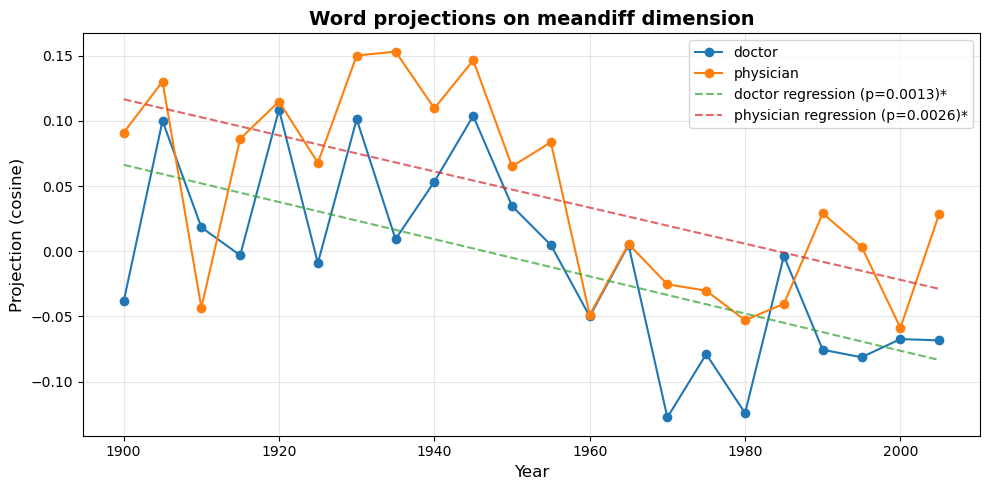

In [31]:
gender_contrasts = [
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

result = compute_projection_over_years(
    model_dir=f"{model_path}",
    token_contrasts=gender_contrasts,
    test_words=['doctor', 'physician'],
    start_year=1900,
    end_year=2005,
    year_step=5,
    method='meandiff',
    ensure_sign_positive=True,
    smooth=False,
    sigma=1,
    verbose=False,
    plot_regression=True
)

Using shared vocabulary: 17630 words found across all models

Baseline word set selection:
  Total vocabulary:          17,630
  Neutral candidates:        16,462 (after anchor & pattern exclusion)
  Selected neutral words:    10,828 (passed stability thresholds)

  Selection thresholds:
    |mu| < 0.080  (mean projection)
    |beta| < 0.0100  (trend/year)
    sigma < 0.150  (temporal variability)
    n >= 5  (minimum years)

  Neutral word statistics:
    Mean |mu|:     0.0380
    Mean |beta|:   0.0006
    Mean sigma:    0.0767

  Over-time correlation:
    Mean:          0.1804
    Median:        0.1827
    Std:           0.0590
    Range:         [0.0179, 0.3651]

  Aggregation:               median



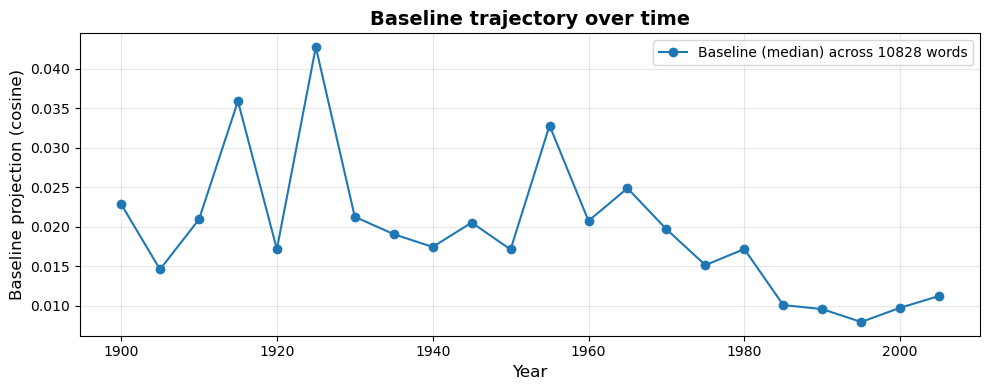

In [35]:
gender_contrasts = [ 
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

baseline_result = compute_baseline_set(
    model_dir=model_path,
    contrast_pairs=gender_contrasts,
    start_year=1900,
    end_year=2005,
    year_step=5,
    method='meandiff',
    exclusion_pattern=r"(man|men|woman|women|girl|boy|wife|husband|mother|father|son|daughter|she|he)",
    eps_mean=0.08,
    eps_trend=0.010,
    eps_sigma=0.15,
    min_years=5,
    agg="median",
    corr_n_permutations=0,
    verbose=True,
    plot_baseline=True
)


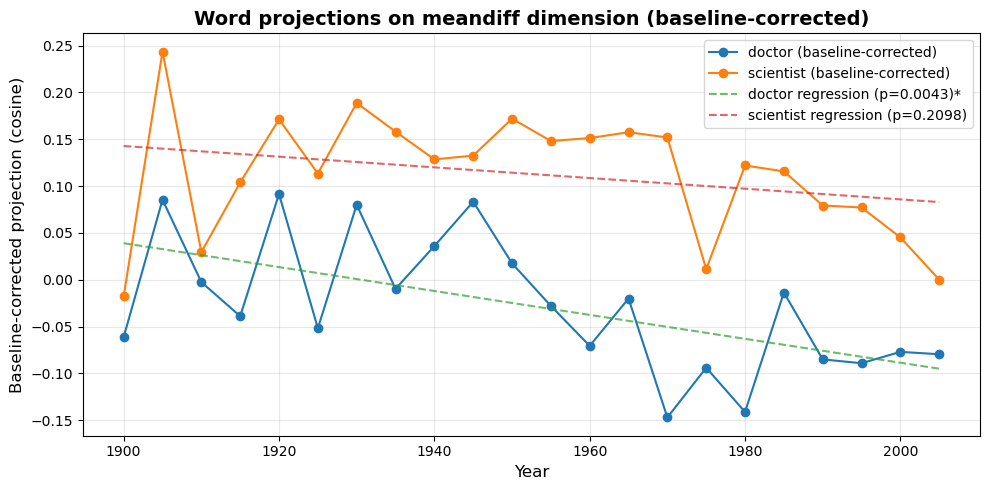

In [52]:
gender_contrasts = [ 
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers')
]

try:
    baseline_result
except NameError:
    baseline_result = compute_baseline_set(
        model_dir=model_path,
        contrast_pairs=gender_contrasts,
        start_year=1900,
        end_year=2019,
        year_step=1,
        method='meandiff',
        ensure_sign_positive=True,
        exclusion_pattern=r"(man|men|woman|women|girl|boy|wife|husband|mother|father|son|daughter|she|he)",
        min_years=5,
        agg="median",
        plot=False,
        corr_n_permutations=0,
    )

targets = ['doctor', 'scientist']

result = compute_projection_over_years(
    model_dir=model_path,
    token_contrasts=gender_contrasts,
    test_words=targets,
    start_year=1900,
    end_year=2019,
    year_step=1,
    method='meandiff',
    ensure_sign_positive=True,
    smooth=False,
    sigma=2,
    verbose=False,
    baseline_result=baseline_result,
    plot_corrected_if_baseline=True,
    plot=True,
    plot_regression=True
 )

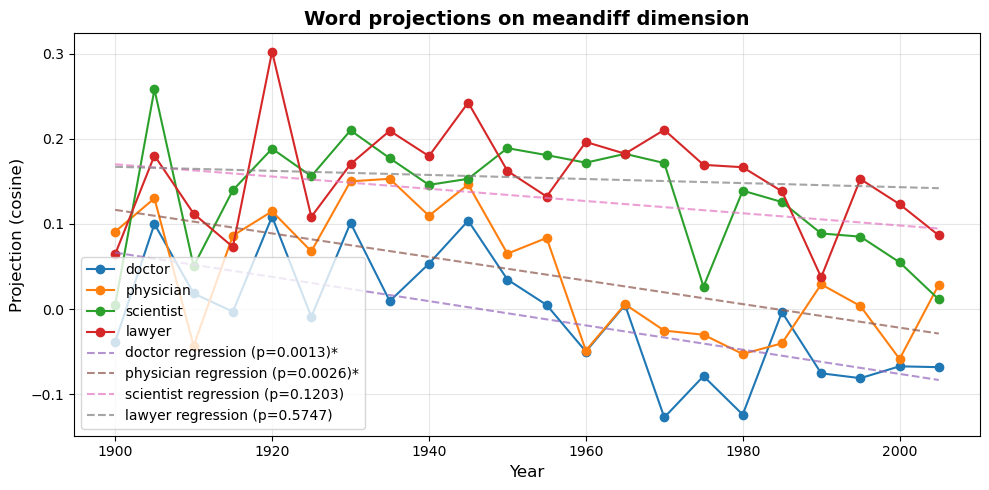

In [64]:
gender_contrasts = [ 
    ('she', 'he'),
    ('her', 'him'),
    ('hers', 'his'),
    ('herself', 'himself'),
    ('woman', 'man'),
    ('women', 'men'),
    ('girl', 'boy'),
    ('girls', 'boys'),
    ('mother', 'father'),
    ('mothers', 'fathers'),
    ('daughter', 'son'),
    ('daughters', 'sons'),
    ('sister', 'brother'),
    ('sisters', 'brothers'),
]

baseline_words = [
    'table', 'chair', 'window', 'door', 'wall', 'floor', 'roof',
    'tree', 'leaf', 'branch', 'root', 'flower', 'grass',
    'water', 'stone', 'rock', 'sand', 'soil', 'clay',
    'book', 'page', 'paper', 'pen', 'ink',
    'cup', 'plate', 'bowl', 'spoon', 'knife', 'fork',
    'bread', 'cheese', 'butter', 'salt', 'sugar',
    'road', 'path', 'bridge', 'gate', 'fence',
    'box', 'bag', 'basket', 'bottle', 'jar',
    'horse', 'cow', 'sheep', 'pig', 'chicken', 'dog', 'cat',
    'sun', 'moon', 'star', 'cloud', 'rain', 'wind',
    'river', 'lake', 'mountain', 'hill', 'valley',
    'wood', 'metal', 'iron', 'gold', 'silver',
    'wheel', 'rope', 'chain', 'nail', 'hammer'
]

targets = ['doctor', 'physician', 'scientist', 'lawyer']

result = compute_projection_over_years(
    model_dir=model_path,
    token_contrasts=gender_contrasts,
    test_words=targets,
    start_year=1900,
    end_year=2009,
    year_step=5,
    method='meandiff',
    ensure_sign_positive=True,
    smooth=False,
    sigma=.5,
    verbose=False,
    baseline_words=baseline_words,
    plot_corrected_if_baseline=True,
    plot=True,
    plot_regression=True
 )